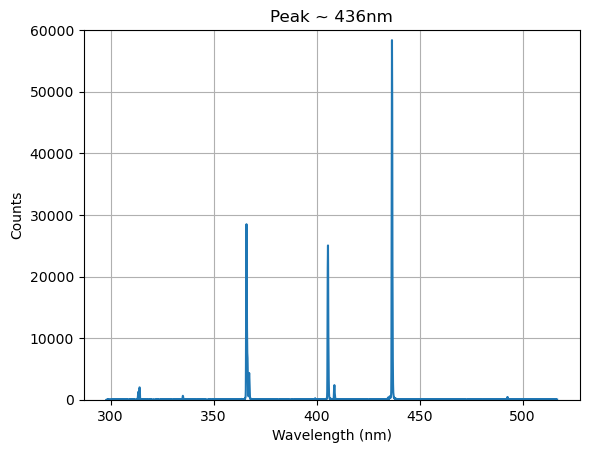

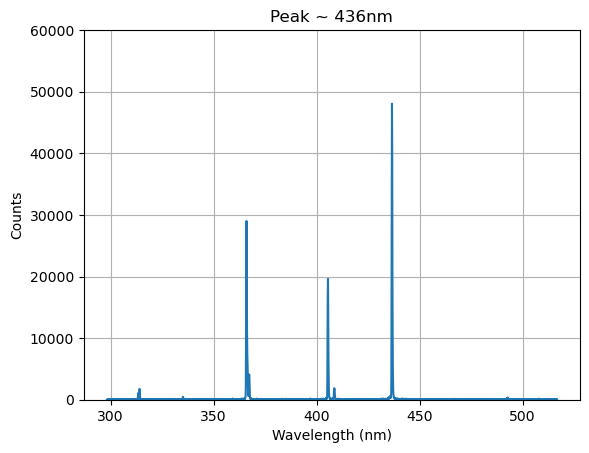

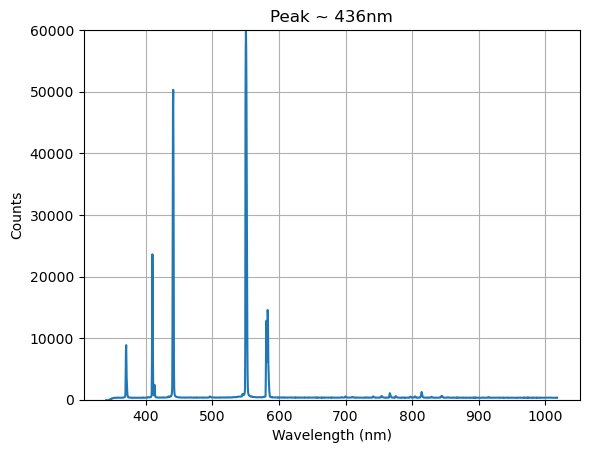

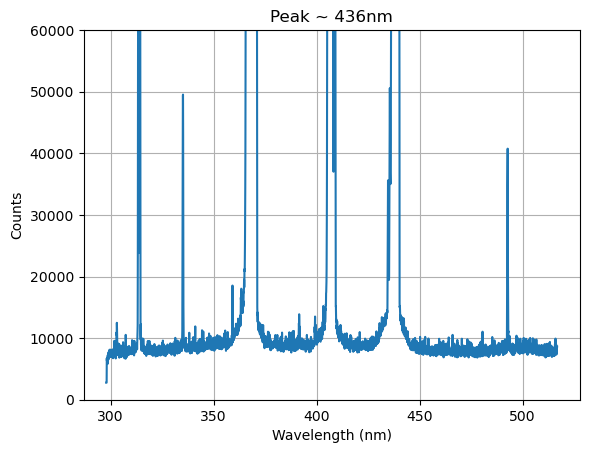

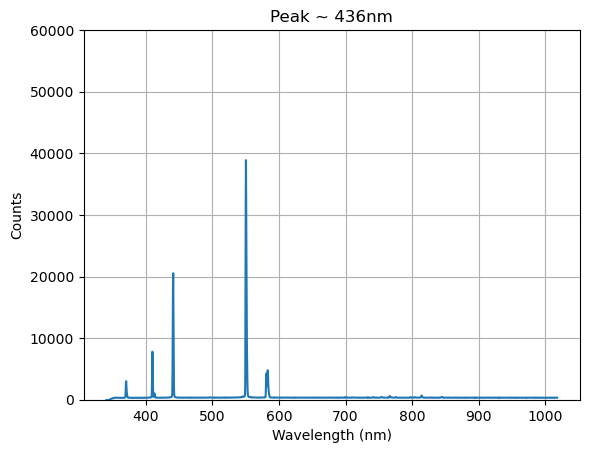

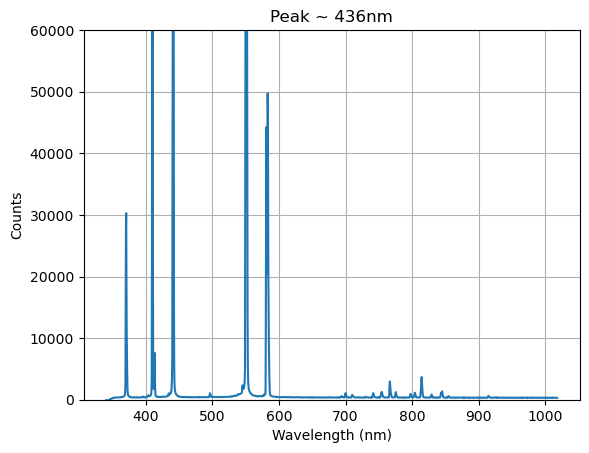

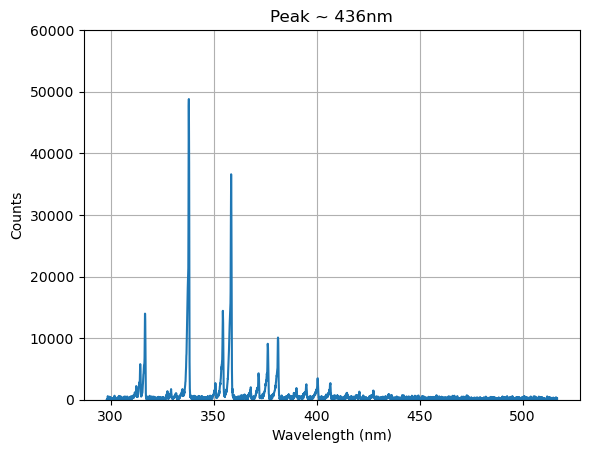

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define file paths and names
file_paths = {
    'MercTEDark': '/home/dj-lawton/Documents/Junior Sophister/JS Labs/Molecular Spectroscopy/Exp1/MercuryDarkClose1_FLMT016052_11-57-24-770.txt',
    'MercTNoEDark': '/home/dj-lawton/Documents/Junior Sophister/JS Labs/Molecular Spectroscopy/Exp1/MercuryNoDarkClose1_FLMT016052_11-33-03-669.txt',
    'MercSSpec': '/home/dj-lawton/Documents/Junior Sophister/JS Labs/Molecular Spectroscopy/Exp1/MercuryS_FLMS043641_12-39-11-815.txt',
    'MercTSaturated': '/home/dj-lawton/Documents/Junior Sophister/JS Labs/Molecular Spectroscopy/Exp1/MercurySATURATED_FLMT016052_11-30-39-931.txt',
    'MercS_big': '/home/dj-lawton/Documents/Junior Sophister/JS Labs/Molecular Spectroscopy/Exp1/MercurySBigPeaks_FLMS043641_12-36-23-480.txt',
    'MercS_small': '/home/dj-lawton/Documents/Junior Sophister/JS Labs/Molecular Spectroscopy/Exp1/MercurySSmallPeaks_FLMS043641_12-37-59-611.txt',
    'N2_Big': '/home/dj-lawton/Documents/Junior Sophister/JS Labs/Molecular Spectroscopy/Exp2/N2TBigPeaks_FLMT016052_12-53-00-515.txt',
}

# Load the data into a dictionary
data_frames = {name: pd.read_csv(path, delim_whitespace=True, names=['Wavelength', 'Counts']) for name, path in file_paths.items()}

sorted_data_frames = {name: df.sort_values(by='Counts') for name, df in data_frames.items()}

# Print the data frames
# for name, df in sorted_data_frames.items():
#     print(f"{name}:(Sorted by Count)\n{df}\n")


# Example usage of one of the data frames
for name, df in data_frames.items():
    plt.plot(df['Wavelength'], df['Counts'], label=name)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Counts')
    plt.title('Peak ~ 436nm')
    plt.grid()
    # plt.xlim(434, 440)
    plt.ylim(0, 60000)
    plt.show()
    plt.close()

     Wavelength     Counts
216     313.053   440.7521
217     313.122   674.2206
218     313.192   721.0313
219     313.262   766.3792
220     313.331   849.1756
221     313.401  1139.6946
222     313.471  1207.2776
223     313.541  1386.3286
224     313.610  1927.8700
225     313.680  2100.1920
226     313.750  2280.9983
[3.42481353e+05 1.49032574e+00 3.18452062e+02] [[3.38725123e+13 1.32909304e+07 8.85902301e+07]
 [1.32909304e+07 5.22308044e+00 3.47872228e+01]
 [8.85902301e+07 3.47872228e+01 2.31784607e+02]]


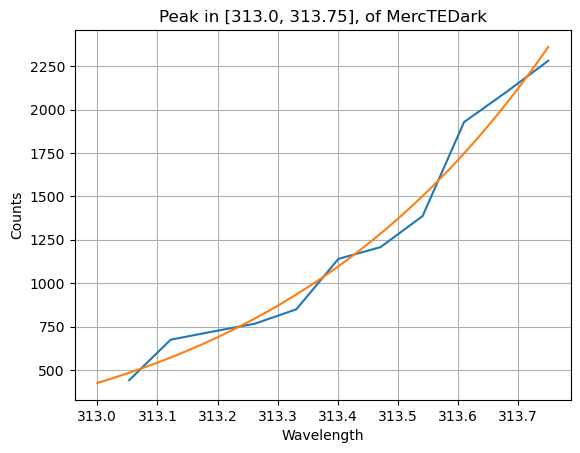

In [43]:
import numpy as np
from scipy.optimize import curve_fit

def gaussian(x, a, b, c):
    return a * np.exp(-(x - c)**2/(2*b**2))


def fit_gaussian(df_, q):
    params, covar = curve_fit(gaussian, df_['Wavelength'], df_['Counts'], p0=q, maxfev=1000000)
    return params, covar

def fitpeakfunc(df, ranges, name):
    df_is = (df['Wavelength']>=ranges[0]) & (df['Wavelength']<=ranges[1])
    df = df[df_is]
    mean = sum(df['Counts']*df['Wavelength'])/sum(df['Counts'])
    sig = np.sqrt(sum(df['Counts']*(df['Wavelength']-mean)**2)/sum(df['Counts']))
    q = [max(df['Counts']),sig, mean]
    print(df)
    params, covar = fit_gaussian(df, q)
    print(params, covar)
    plt.figure()
    plt.plot(df['Wavelength'], df['Counts'], label='Data')
    plt.plot(np.linspace(ranges[0], ranges[1], 10*len(df)), gaussian(np.linspace(ranges[0], ranges[1], 10*len(df)), *params), label='Fit')
    # plt.fill_between(df['Wavelength'], gaussian(df['Wavelength'], *params-(np.diag(covar))^2), gaussian(df['Wavelength'], *params+(np.diag(covar))^2), alpha=0.5)
    plt.xlabel('Wavelength')
    plt.ylabel('Counts')
    plt.title(f'Peak in {ranges}, of {name}')
    plt.grid()
    # plt.savefig(f'Peak in {ranges}, of {name}.png')
    plt.show()

    return params, covar

q = fitpeakfunc(data_frames['N2_Big'], [313., 313.75], 'MercTEDark')

Identified peaks at indices: [ 230 1001 1021 1628 1679 2149]
     Wavelength     Counts
228     313.889  1264.7060
229     313.959  1910.8402
230     314.028  2007.0947
231     314.098  1979.4471
232     314.168  1638.4603
[2.08231952e+03 1.67588759e-01 3.14048780e+02] [[ 5.00248741e+03 -7.44883483e-01 -8.55309009e-02]
 [-7.44883483e-01  2.32278655e-04  4.07169702e-05]
 [-8.55309009e-02  4.07169702e-05  7.02714466e-05]]


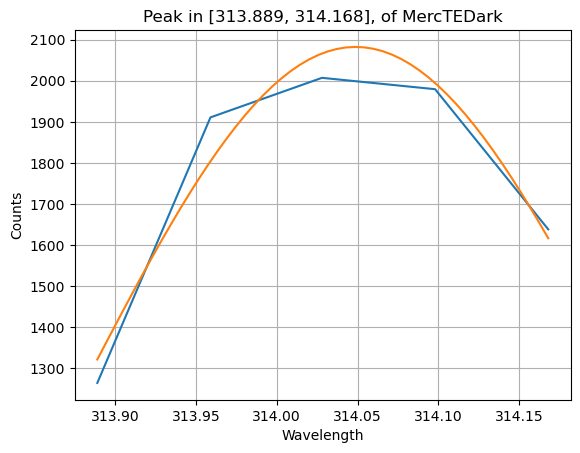

      Wavelength      Counts
973      364.107     61.5244
974      364.172     19.5410
975      364.237     66.6443
976      364.302     59.4764
977      364.367     58.4524
978      364.432     38.9967
979      364.497     67.6683
980      364.563     95.3159
981      364.628     76.8842
982      364.693    109.6517
983      364.758    101.4598
984      364.823     57.4285
985      364.888     83.0281
986      364.953    100.4358
987      365.018    165.9708
988      365.083    114.7716
989      365.148    159.8269
990      365.213    154.7070
991      365.278    203.8582
992      365.343    257.1054
993      365.408    351.3120
994      365.474    441.4226
995      365.539    745.5460
996      365.604   1632.3164
997      365.669   5699.5824
998      365.734  14817.1392
999      365.799  21798.6647
1000     365.864  27060.9204
1001     365.929  28491.4266
1002     365.994  27836.0766
1003     366.058  21115.6671
1004     366.123  14064.5107
1005     366.188  11610.0202
1006     366.2

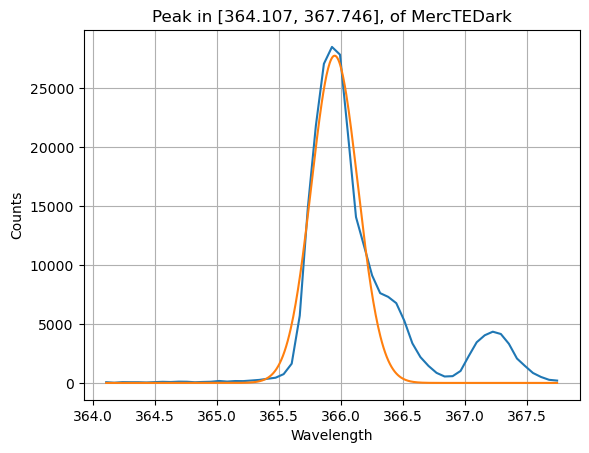

      Wavelength     Counts
1017     366.967  1016.9018
1018     367.032  2264.1148
1019     367.097  3447.8407
1020     367.162  4040.7277
1021     367.227  4343.8271
1022     367.292  4148.2460
1023     367.357  3315.7467
1024     367.422  2068.5338
1025     367.486  1445.9513
[4.44450666e+03 1.64429737e-01 3.67227677e+02] [[ 1.03926078e+04 -3.18948133e-01 -4.74403320e-04]
 [-3.18948133e-01  2.56847914e-05  3.36579273e-08]
 [-4.74403320e-04  3.36579273e-08  1.91627366e-05]]


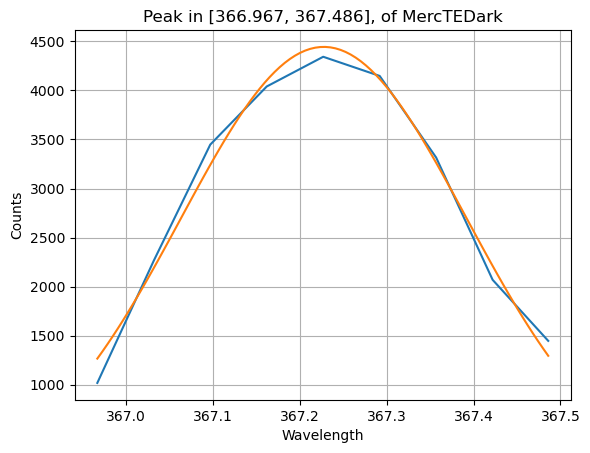

      Wavelength      Counts
1603     403.951     12.3731
1604     404.012     41.0447
1605     404.073     64.5963
1606     404.135     17.4931
1607     404.196     -1.9626
1608     404.257     47.1886
1609     404.319     45.1406
1610     404.380     90.1960
1611     404.441     66.6443
1612     404.502     52.3085
1613     404.564    159.8269
1614     404.625     90.1960
1615     404.686     86.1000
1616     404.747    117.8435
1617     404.809     94.2919
1618     404.870    151.6350
1619     404.931    234.5778
1620     404.992    267.3453
1621     405.054    575.5646
1622     405.115   1292.3536
1623     405.176   4060.1834
1624     405.237  11041.7088
1625     405.299  17429.3234
1626     405.360  21365.5193
1627     405.421  24308.4504
1628     405.482  25043.6712
1629     405.543  21919.4949
1630     405.605  14941.0413
1631     405.666  10687.4103
1632     405.727   7628.7689
1633     405.788   5141.5109
1634     405.849   3296.2910
1635     405.910   1945.6556
1636     405.9

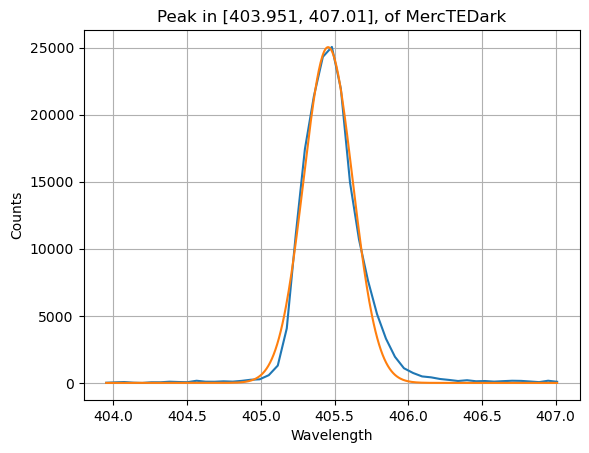

      Wavelength     Counts
1677     408.473  2052.1500
1678     408.534  2250.8030
1679     408.595  2369.5852
1680     408.656  2142.2606
1681     408.716  1493.0546
[2.39393413e+03 1.59078695e-01 4.08568094e+02] [[ 5.57862072e+03 -7.94878070e-01  1.30982760e-01]
 [-7.94878070e-01  2.42861858e-04 -6.26025539e-05]
 [ 1.30982760e-01 -6.26025539e-05  7.07579454e-05]]


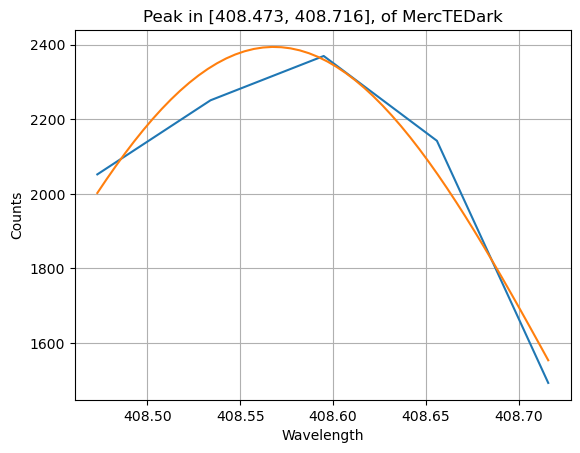

      Wavelength    Counts
2091     433.162   28.7569
2092     433.221    9.3012
2093     433.279  122.9635
2094     433.338   10.3252
2095     433.396   50.2606
...          ...       ...
2203     439.663   65.6203
2204     439.721   79.9561
2205     439.779   56.4045
2206     439.836   75.8602
2207     439.894   60.5004

[117 rows x 2 columns]
[5.83676273e+04 1.60591270e-01 4.36549356e+02] [[ 4.57968038e+05 -8.38839405e-01  2.06403598e-03]
 [-8.38839405e-01  4.61943656e-06  2.51880232e-09]
 [ 2.06403598e-03  2.51880232e-09  4.63102248e-06]]


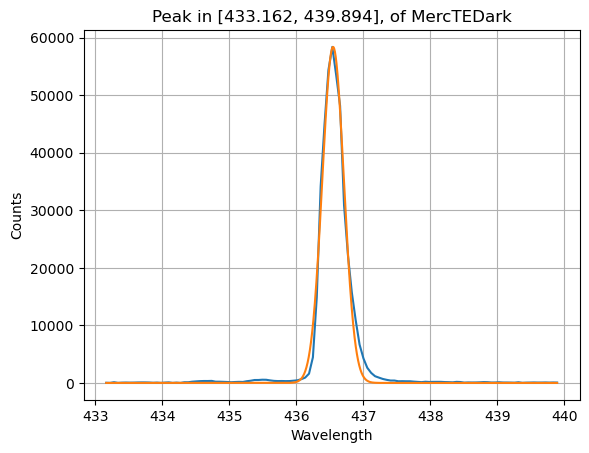

(array([5.83676273e+04, 1.60591270e-01, 4.36549356e+02]),
 array([[ 4.57968038e+05, -8.38839405e-01,  2.06403598e-03],
        [-8.38839405e-01,  4.61943656e-06,  2.51880232e-09],
        [ 2.06403598e-03,  2.51880232e-09,  4.63102248e-06]]))

In [46]:
from scipy.signal import find_peaks

def identify_and_fit_peaks(df, name, height=None, distance=None, prominence=None):
    # Identify peaks
    peaks, properties = find_peaks(df['Counts'], height=height, distance=distance, prominence=1000)
    print(f"Identified peaks at indices: {peaks}")

    # Fit Gaussian to each identified peak
    for peak in peaks:
        peak_height = properties['peak_heights'][np.where(peaks == peak)][0]
        range_width = peak_height / 1000  # Adjust this factor as needed
        peak_range = [df['Wavelength'].iloc[max(0, peak-int(range_width))], df['Wavelength'].iloc[min(len(df)-1, peak+int(range_width))]]
        params, covar = fitpeakfunc(df, peak_range, name)
    
    return params, covar
    

identify_and_fit_peaks(data_frames['MercTEDark'], 'MercTEDark', height=1000, distance=10, prominence=1000)